In [ ]:
'''
Exercises XP

What you will learn
Learn how to load, inspect, and preprocess data using Python and its libraries. This includes handling CSV files, cleaning data, and splitting datasets into training and testing sets.
Understand the fundamentals of EDA, such as analyzing data distributions, identifying patterns, and extracting insights from datasets.
Machine Learning Model Building: Gain hands-on experience in building machine learning models using different algorithms like Logistic Regression, Support Vector Machines (SVM), and XGBoost.
Learn the importance of hyperparameters in machine learning models and how to optimize them using techniques like Grid Search.
Develop skills in assessing the performance of machine learning models using various metrics and techniques.
Enhance your ability to make decisions about model selection, hyperparameter settings, and interpret the outcomes of your analyses.

What you will create
series of machine learning models capable of classifying species of the Iris flower based on their characteristics.
Comparison of Model Performances
Comprehensive Analysis Report
Hyperparameter Tuning Framework
Data Visualization Tools

You will be using this dataset: Heart Disease Prediction Dataset

'''

In [15]:
'''
Exercise 1 : Exploratory Data Analysis

Load the data from CSV files
Remove target column from the training data
Split the data into train/test split
Understand the data
'''
import pandas as pd

df = pd.read_csv('dataset_heart.csv')

# the last column is the target column
target = 'heart disease'

X = df.drop(columns=[target])  # all features except the target column
y = df[target]  # df with the target column

df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report:
              precision    recall  f1-score   support

           1       0.81      0.90      0.85        42
           2       0.88      0.77      0.82        39

    accuracy                           0.84        81
   macro avg       0.85      0.84      0.84        81
weighted avg       0.84      0.84      0.84        81

Confusion matrix:
[[38  4]
 [ 9 30]]


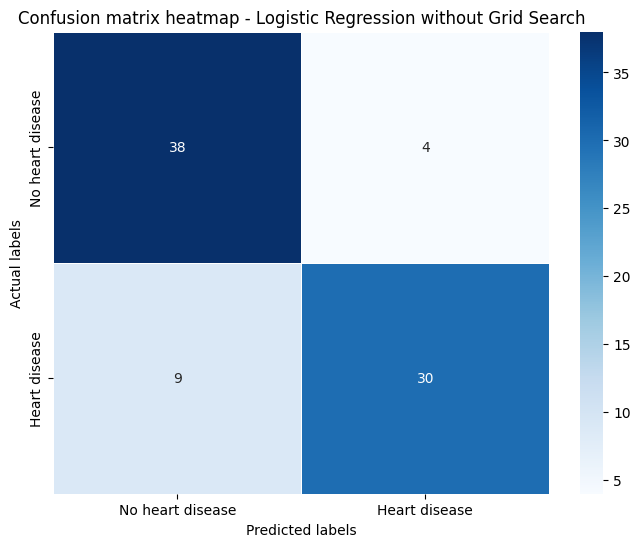

In [16]:
'''
Exercise 2 : Logistic Regression without Grid Search

Use the dataset to build a logistic regression model without using grid search.
Split the data into training and testing sets, then train a logistic regression model and evaluate its performance on the test set.

'''

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

LR_model = LogisticRegression(random_state=1, max_iter=1000)

# train the logistic regression model
LR_model.fit(X_train, y_train)

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~

# evaluate performance

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# make predictions on the test data
LR_y_pred = LR_model.predict(X_test)

print("Classification report:")
print(classification_report(y_test, LR_y_pred))

# generate the confusion matrix
cm = confusion_matrix(y_test, LR_y_pred)

print("Confusion matrix:")
print(cm)

# define class names
class_names = ['No heart disease', 'Heart disease']

# create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# plot a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.title("Confusion matrix heatmap - Logistic Regression without Grid Search")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.8520625889046942
Classification report:
              precision    recall  f1-score   support

           1       0.81      0.90      0.85        42
           2       0.88      0.77      0.82        39

    accuracy                           0.84        81
   macro avg       0.85      0.84      0.84        81
weighted avg       0.84      0.84      0.84        81

Confusion matrix:
[[38  4]
 [ 9 30]]


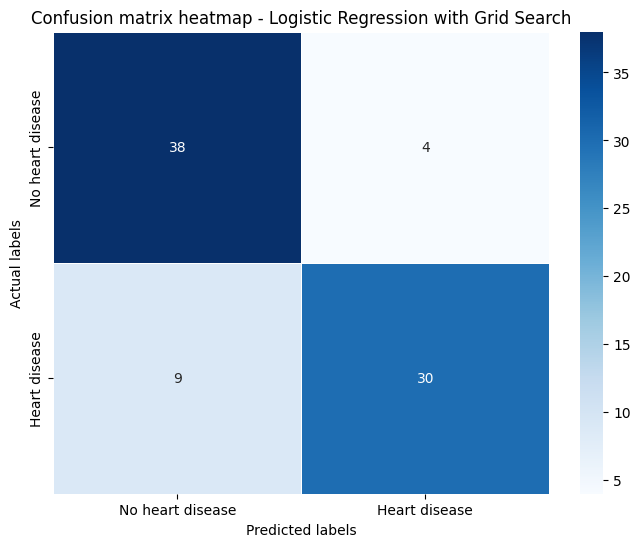

The model with GridSearchCV performed the same as without GridSearchCV.  We got the same results.


In [17]:
'''
Exercise 3 : Logistic Regression with Grid Search

Build a logistic regression model using the dataset, but this time, use GridSearchCV to optimize the hyperparameters such as C and penalty.
'''

import numpy as np
from sklearn.model_selection import GridSearchCV

# I'm using the code from the example on the Octopus website

# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)  # 15 numbers from 10^-5 to 10^8
param_grid = {'C': c_space}

# Instantiating logistic regression classifier
LR_model = LogisticRegression(random_state=1, max_iter=1000)

# Instantiating the GridSearchCV object
LR_model_cv = GridSearchCV(LR_model, param_grid, cv=5)

# Fit the GridSearchCV object to the data
LR_model_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print(f"Tuned Logistic Regression Parameters: {LR_model_cv.best_params_}")
print(f"Best score is {LR_model_cv.best_score_}")

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~

# evaluate performance

# it's the same evaluation code from the previous question

# make predictions on the test data - but with the GridSearchCV object
LR_y_pred_cv = LR_model_cv.predict(X_test)

print("Classification report:")
print(classification_report(y_test, LR_y_pred_cv))

# generate the confusion matrix
cm = confusion_matrix(y_test, LR_y_pred_cv)

print("Confusion matrix:")
print(cm)

# define class names
class_names = ['No heart disease', 'Heart disease']

# create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# plot a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.title("Confusion matrix heatmap - Logistic Regression with Grid Search")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()

print("The model with GridSearchCV performed the same as without GridSearchCV.  We got the same results.")


In [18]:
'''
Exercise 4 : SVM without Grid Search

Train a Support Vector Machine (SVM) classifier on the dataset without using grid search.
Choose an appropriate kernel and set the hyperparameters manually.

'''
# This piece of code is from the example on the Octopus website

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create and train the Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Make predictions on the test set
svc_y_pred = svc_model.predict(X_test)

# Calculate accuracy
svc_accuracy = accuracy_score(y_test, svc_y_pred)
print(f'Accuracy (SVC): {svc_accuracy}')


Accuracy (SVC): 0.6296296296296297


In [19]:
'''
Exercise 5 : SVM with Grid Search

Implement an SVM classifier on the dataset with GridSearchCV to find the best combination of C, kernel, and gamma hyperparameters.

'''

# Let create parameter grid for GridSearchCV
parameters = {  'C':[0.01, 1, 5],
                'kernel':('linear', 'rbf'),
                'gamma' :('scale', 'auto')
             }

# create a grid search object
svc_model_cv = GridSearchCV(estimator = SVC(), param_grid= parameters,cv= 5,verbose =1)

# Fitting the model for grid search.
svc_model_cv.fit(X_train, y_train)

#  this will give us the best score
print(f'Best hyperparameters: {svc_model_cv.best_params_}') # The best params are: {'C': 5, 'gamma': 'scale', 'kernel': 'linear'}
print(f'Best score: {svc_model_cv.best_score_}')  # Best score: 0.836

# Here we can see all the results of the CV.  The best model is the first on the list.
# (convert the dict into a DataFrame and sort the values in descending order)
gsc_result = pd.DataFrame(svc_model_cv.cv_results_).sort_values('mean_test_score',ascending= False)
gsc_result[['param_C','param_kernel','param_gamma','mean_test_score']]

# now let's check the accuracy
svc_y_pred_cv = svc_model_cv.predict(X_test)
svc_cv_accuracy = accuracy_score(y_test, svc_y_pred_cv)
print(f'Accuracy (SVC CV): {svc_cv_accuracy}')


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters: {'C': 5, 'gamma': 'scale', 'kernel': 'linear'}
Best score: 0.8362731152204835
Accuracy (SVC CV): 0.8271604938271605


In [20]:
'''
Exercise 6 : XGBoost without Grid Search

Use the dataset to train an XGBoost classifier without hyperparameter tuning.
Set the hyperparameters manually and justify your choices.

'''
# This piece of code is similar to the example on the Octopus website

import xgboost as xgb

# Create and train the XGBoost classifier
xgb_model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)
xgb_model.fit(X_train, y_train-1)  # I had to subtract 1 from y_train because the xgb target column must be 0 or 1, but in our case it's 1 or 2

# Make predictions on the test set
xgb_y_pred = xgb_model.predict(X_test) + 1  # this is the opposite - I had to add 1 to the predictions because the xgb target column must be 1 or 2, but in our case it's 0 or 1

# Calculate accuracy
accuracy = accuracy_score(y_test, xgb_y_pred)
print(f'Accuracy (XGB): {accuracy}')


Accuracy (XGB): 0.7901234567901234


In [21]:
'''
Exercise 7 : XGBoost with Grid Search

Train an XGBoost classifier on the dataset using GridSearchCV to optimize hyperparameters such as learning_rate, n_estimators, max_depth, etc.

'''

# let's define the hyperparameter grid for the xgb
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# create the GridSearchCV
xgb_model_cv = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

# perform the grid search on the training data
xgb_model_cv.fit(X_train, y_train-1)

# display the best parameters and its score
print("Best Parameters:", xgb_model_cv.best_params_)
print("Best Cross-Validation Accuracy:", xgb_model_cv.best_score_)

# Test the best model on the test set
xgb_y_pred_cv = xgb_model_cv.predict(X_test)+1
test_accuracy = accuracy_score(y_test, xgb_y_pred_cv)
print(f"Test Accuracy (XGB CV): {test_accuracy:.2f}")




Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.8203413940256045
Test Accuracy (XGB CV): 0.80


In [ ]:
# so we got 0.82 accuracy with the best model from the grid search.
# a little bit better than the 0.79 accuracy we got with the model without the grid search.
